In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime

%matplotlib inline

In [2]:
df_raw = pd.read_csv('crypto_prices.csv')

In [3]:
df_raw.set_index("dtime", inplace = True)
df_raw = df_raw.reindex(index=df_raw.index[::-1])
df_raw = df_raw.drop(columns = ['time'])

In [4]:
df_raw.head()

,open_BTC,high_BTC,low_BTC,close_BTC,vwap_BTC,volume_BTC,count_BTC,log_high_BTC,log_low_BTC,log_vwap_BTC,...,open_LTC,high_LTC,low_LTC,close_LTC,vwap_LTC,volume_LTC,count_LTC,log_high_LTC,log_low_LTC,log_vwap_LTC
dtime,,,,,,,,,,,,,,,,,,,,,
2018-09-30,6582.2,6641.0,6518.0,6604.1,6584.8,1020.607491,3376,8.801018,8.782323,8.792519,...,61.12,62.77,59.70,60.96,60.82,8109.434922,1011,4.139477,4.089332,4.107919
2018-10-01,6603.8,6633.3,6490.2,6572.6,6564.9,1863.850102,5019,8.799858,8.778049,8.789493,...,60.96,61.82,59.08,60.29,60.18,9359.218092,1249,4.124227,4.078892,4.097340
2018-10-02,6574.5,6597.0,6436.2,6500.0,6529.6,2458.395238,4704,8.794370,8.769694,8.784101,...,60.45,61.46,58.67,59.15,60.15,4359.474024,874,4.118387,4.071929,4.096841
2018-10-03,6497.7,6521.1,6397.6,6463.9,6470.3,4959.145443,8269,8.782798,8.763678,8.774978,...,59.14,59.20,56.50,57.23,57.58,8337.848361,1060,4.080922,4.034241,4.053175
2018-10-04,6463.8,6598.9,6461.0,6547.4,6550.8,1940.218975,5664,8.794658,8.773539,8.787342,...,57.16,58.84,56.52,57.97,58.12,8468.435950,607,4.074822,4.034595,4.062510


In [5]:
df_copy = df_raw.copy()

In [6]:
df_copy.head()

,open_BTC,high_BTC,low_BTC,close_BTC,vwap_BTC,volume_BTC,count_BTC,log_high_BTC,log_low_BTC,log_vwap_BTC,...,open_LTC,high_LTC,low_LTC,close_LTC,vwap_LTC,volume_LTC,count_LTC,log_high_LTC,log_low_LTC,log_vwap_LTC
dtime,,,,,,,,,,,,,,,,,,,,,
2018-09-30,6582.2,6641.0,6518.0,6604.1,6584.8,1020.607491,3376,8.801018,8.782323,8.792519,...,61.12,62.77,59.70,60.96,60.82,8109.434922,1011,4.139477,4.089332,4.107919
2018-10-01,6603.8,6633.3,6490.2,6572.6,6564.9,1863.850102,5019,8.799858,8.778049,8.789493,...,60.96,61.82,59.08,60.29,60.18,9359.218092,1249,4.124227,4.078892,4.097340
2018-10-02,6574.5,6597.0,6436.2,6500.0,6529.6,2458.395238,4704,8.794370,8.769694,8.784101,...,60.45,61.46,58.67,59.15,60.15,4359.474024,874,4.118387,4.071929,4.096841
2018-10-03,6497.7,6521.1,6397.6,6463.9,6470.3,4959.145443,8269,8.782798,8.763678,8.774978,...,59.14,59.20,56.50,57.23,57.58,8337.848361,1060,4.080922,4.034241,4.053175
2018-10-04,6463.8,6598.9,6461.0,6547.4,6550.8,1940.218975,5664,8.794658,8.773539,8.787342,...,57.16,58.84,56.52,57.97,58.12,8468.435950,607,4.074822,4.034595,4.062510


In [7]:
df_copy.isna().sum()

open_BTC        0
high_BTC        0
low_BTC         0
close_BTC       0
vwap_BTC        0
volume_BTC      0
count_BTC       0
log_high_BTC    0
log_low_BTC     0
log_vwap_BTC    0
open_ETH        0
high_ETH        0
low_ETH         0
close_ETH       0
vwap_ETH        0
volume_ETH      0
count_ETH       0
log_high_ETH    0
log_low_ETH     0
log_vwap_ETH    0
open_LTC        0
high_LTC        0
low_LTC         0
close_LTC       0
vwap_LTC        0
volume_LTC      0
count_LTC       0
log_high_LTC    0
log_low_LTC     0
log_vwap_LTC    0
dtype: int64

In [8]:
# Creating a test split
# Talk to Blake about this.

size = int(len(df_copy) * 0.8)

In [13]:
df = df_copy.iloc[:size]

In [14]:
df_test = df_copy.iloc[size:]

In [15]:
df.head()

,open_BTC,high_BTC,low_BTC,close_BTC,vwap_BTC,volume_BTC,count_BTC,log_high_BTC,log_low_BTC,log_vwap_BTC,...,open_LTC,high_LTC,low_LTC,close_LTC,vwap_LTC,volume_LTC,count_LTC,log_high_LTC,log_low_LTC,log_vwap_LTC
dtime,,,,,,,,,,,,,,,,,,,,,
2018-09-30,6582.2,6641.0,6518.0,6604.1,6584.8,1020.607491,3376,8.801018,8.782323,8.792519,...,61.12,62.77,59.70,60.96,60.82,8109.434922,1011,4.139477,4.089332,4.107919
2018-10-01,6603.8,6633.3,6490.2,6572.6,6564.9,1863.850102,5019,8.799858,8.778049,8.789493,...,60.96,61.82,59.08,60.29,60.18,9359.218092,1249,4.124227,4.078892,4.097340
2018-10-02,6574.5,6597.0,6436.2,6500.0,6529.6,2458.395238,4704,8.794370,8.769694,8.784101,...,60.45,61.46,58.67,59.15,60.15,4359.474024,874,4.118387,4.071929,4.096841
2018-10-03,6497.7,6521.1,6397.6,6463.9,6470.3,4959.145443,8269,8.782798,8.763678,8.774978,...,59.14,59.20,56.50,57.23,57.58,8337.848361,1060,4.080922,4.034241,4.053175
2018-10-04,6463.8,6598.9,6461.0,6547.4,6550.8,1940.218975,5664,8.794658,8.773539,8.787342,...,57.16,58.84,56.52,57.97,58.12,8468.435950,607,4.074822,4.034595,4.062510


In [16]:
df_test.head()

,open_BTC,high_BTC,low_BTC,close_BTC,vwap_BTC,volume_BTC,count_BTC,log_high_BTC,log_low_BTC,log_vwap_BTC,...,open_LTC,high_LTC,low_LTC,close_LTC,vwap_LTC,volume_LTC,count_LTC,log_high_LTC,log_low_LTC,log_vwap_LTC
dtime,,,,,,,,,,,,,,,,,,,,,
2020-04-28,7792.4,7794.9,7671.1,7755.8,7729.2,4062.288739,9652,8.961225,8.945215,8.952761,...,44.53,46.17,43.60,45.78,44.84,13520.660750,896,3.832330,3.775057,3.803101
2020-04-29,7755.8,8978.0,7727.6,8779.9,8403.2,20471.051907,54201,9.102532,8.952554,9.036368,...,45.78,49.99,45.75,48.81,48.10,39560.390158,2283,3.911823,3.823192,3.873282
2020-04-30,8779.9,9487.9,8410.0,8629.6,8933.8,23985.389926,61295,9.157773,9.037177,9.097597,...,48.81,50.91,45.65,46.37,48.15,49042.370490,2813,3.930059,3.821004,3.874321
2020-05-01,8629.6,9065.0,8628.3,8824.6,8805.3,8508.443956,24971,9.112176,9.062803,9.083109,...,46.37,48.30,46.37,47.10,47.29,15505.184381,920,3.877432,3.836653,3.856299
2020-05-02,8824.6,9016.2,8756.4,8983.1,8893.4,5754.072814,19633,9.106778,9.077540,9.093065,...,47.10,49.57,46.83,49.21,48.35,23526.883643,1372,3.903386,3.846524,3.878466


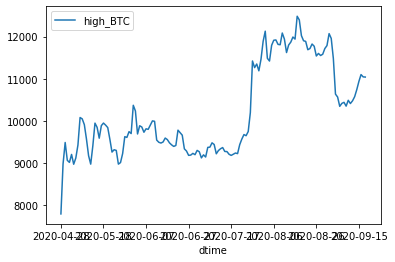

In [17]:
df_test.plot(y=['high_BTC'])

Text(0, 0.5, 'Price ($)')

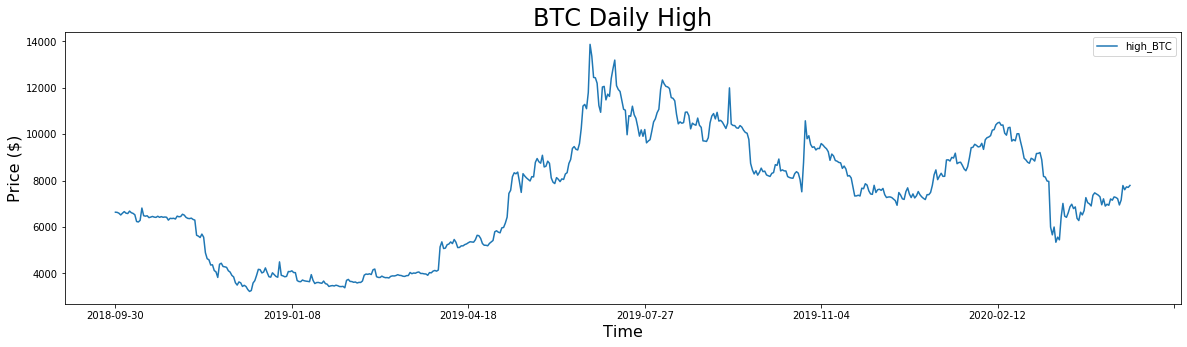

In [20]:
df.plot(y=['high_BTC'], figsize=(20, 5))
plt.title("BTC Daily High", size = 24)
plt.xlabel("Time", size = 16)
plt.ylabel("Price ($)", size = 16)

---

In [22]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

Test different Bitcoin series and returns for stationarity.

In [23]:
sts.adfuller(df['high_BTC'])

(-1.5721227056067226,
 0.49758028612871114,
 4,
 571,
 {'1%': -3.4418542752662518,
  '5%': -2.8666150225357914,
  '10%': -2.569472836146374},
 7993.066850619258)

In [24]:
sts.adfuller(df['log_high_BTC'])

(-1.2555869749437372,
 0.6492386590531265,
 0,
 575,
 {'1%': -3.4417738839904657,
  '5%': -2.8665796253604015,
  '10%': -2.569453974291115},
 -1987.5352301519697)

Bitcoin high and log_high prices are non-stationary. We'll need an integrated model.

### ETH tests for stationarity.

In [25]:
sts.adfuller(df['high_ETH'])

(-2.9480998123734583,
 0.04003376536681929,
 13,
 562,
 {'1%': -3.442039359113542,
  '5%': -2.8666965134862514,
  '10%': -2.5695162601790758},
 3929.960574718284)

We can reject the null hypothesis at 5% significance, thus time series is stationary.

In [26]:
sts.adfuller(df['log_high_ETH'])

(-2.7641581077918542,
 0.06357872095355173,
 5,
 570,
 {'1%': -3.441874550188182,
  '5%': -2.8666239496633246,
  '10%': -2.569477593105571},
 -1885.8906096359015)

Fail to reject null hypothesis on log_high at 5%.

If test statistic is < critical value, we can reject H0 at that level of significance.

https://machinelearningmastery.com/time-series-data-stationary-python/

## LTC tests for stationarity

In [27]:
sts.adfuller(df['high_LTC'])

(-1.8171601943589657,
 0.3719760270510686,
 14,
 561,
 {'1%': -3.442060292264578,
  '5%': -2.866705729876777,
  '10%': -2.569521171354946},
 2913.4493656486193)

Fail to reject H0

In [28]:
sts.adfuller(df['log_high_LTC'])

(-1.4779980919842144,
 0.5443659398515502,
 6,
 569,
 {'1%': -3.4418948967017475,
  '5%': -2.8666329082535222,
  '10%': -2.569482366838501},
 -1792.563770757457)

Fail to reject H0

---

## Auto Arima models for each series.